In [36]:
from IPython.display import Image
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [37]:
# load data dari CSV
df = pd.read_csv("DATASET.csv")
df

,no,bulan,Ruang,BPJS KETENAGAKERJAAN,BPJS PBI,BPJS NON PBI,INHEALTH GOLD,INHEALTH PLATINUM,INHEALTH SILVER,INHEALTH BLUE,INHEALTH ALBA,PERUSAHAAN,UMUM,JASA RAHARJA,BNI LIFE,PGOT,AHMEDIKA,OWLEXA,OWLEXA INHEALTH
0,1.0,JANUARI,ARIMBI,1.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,FEBRUARI,ARIMBI,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,MARET,ARIMBI,0.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,APRIL,ARIMBI,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,MEI,ARIMBI,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# memisah data kedalam array
bulan = []
ruang = []
pembayaran = []
transaksi= []

for i,j in df.iterrows():
    if j[1] not in bulan:
        bulan.append(j[1])
    if j[2] not in ruang:
        ruang.append(j[2])
        
for kolom in df.columns[3:]:
    pembayaran.append(kolom)

for i,j in df.iterrows():
    b = -1 
    for index, data in enumerate(bulan):
        if data == j[1]:
            b = index
            break
    r = -1 
    for index, data in enumerate(ruang):
        if data == j[2]:
            r = index
            break
    
    for index, data in enumerate(pembayaran):
        if math.isnan(j[index+3]) == False:
            if((j[index+3] != 0.0) == True):
                transaksi.append([b+1,r+1,index+1, j[index+3]]) 
    

In [39]:
# membersihkan data
bulan = bulan[:-2]
ruang = ruang[:-1]

In [40]:
# menampilkan data per array
transaksi

[[1, 1, 1, 1.0],
 [1, 1, 3, 97.0],
 [1, 1, 10, 6.0],
 [2, 1, 3, 79.0],
 [2, 1, 10, 10.0],
 [3, 1, 3, 94.0],
 [3, 1, 10, 11.0],
 [4, 1, 3, 81.0],
 [4, 1, 10, 14.0],
 [5, 1, 3, 99.0],
 [5, 1, 10, 7.0],
 [5, 1, 12, 1.0],
 [6, 1, 3, 82.0],
 [6, 1, 10, 7.0],
 [7, 1, 3, 97.0],
 [7, 1, 10, 1.0],
 [8, 1, 3, 97.0],
 [8, 1, 10, 4.0],
 [9, 1, 3, 80.0],
 [9, 1, 10, 5.0],
 [9, 1, 11, 1.0],
 [10, 1, 3, 96.0],
 [10, 1, 10, 4.0],
 [10, 1, 14, 1.0],
 [1, 2, 3, 91.0],
 [1, 2, 10, 12.0],
 [2, 2, 3, 83.0],
 [2, 2, 4, 1.0],
 [2, 2, 10, 5.0],
 [3, 2, 3, 78.0],
 [3, 2, 10, 9.0],
 [4, 2, 3, 86.0],
 [4, 2, 10, 6.0],
 [5, 2, 3, 92.0],
 [5, 2, 10, 10.0],
 [6, 2, 3, 92.0],
 [6, 2, 10, 4.0],
 [6, 2, 11, 1.0],
 [7, 2, 3, 92.0],
 [7, 2, 9, 1.0],
 [7, 2, 10, 4.0],
 [8, 2, 3, 95.0],
 [8, 2, 10, 4.0],
 [9, 2, 3, 84.0],
 [9, 2, 10, 8.0],
 [10, 2, 3, 85.0],
 [10, 2, 10, 6.0],
 [1, 3, 2, 209.0],
 [1, 3, 3, 199.0],
 [1, 3, 10, 44.0],
 [2, 3, 2, 189.0],
 [2, 3, 3, 164.0],
 [2, 3, 9, 1.0],
 [2, 3, 10, 19.0],
 [3, 3, 2, 212.0

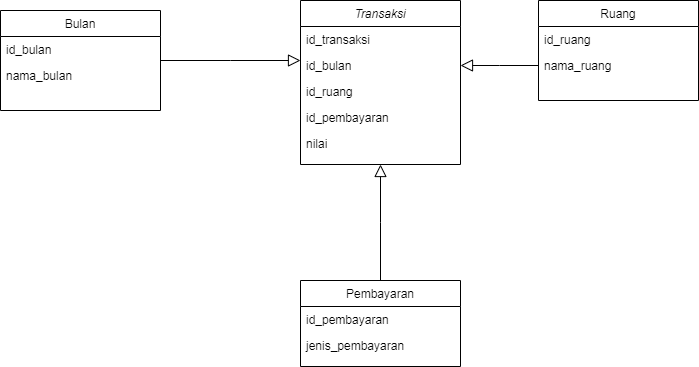

In [47]:
# import gambar desain database
Image(filename='rawatinap.png')

In [48]:
import sqlite3

In [49]:
# membuat database
conn = sqlite3.connect('db4.db')

In [50]:
# membuat inisial query 
c = conn.cursor()

In [51]:
# membuat table
c.executescript('drop table if exists Transaksi')
c.executescript('drop table if exists Bulan')
c.executescript('drop table if exists Ruang')
c.executescript('drop table if exists Pembayaran')
c.execute("CREATE TABLE IF NOT EXISTS 'Transaksi' ('id_transaksi' INT, 'id_bulan'  INT, 'id_ruang' INT, 'id_pembayaran' INT, 'nilai' INT, PRIMARY KEY ('id_transaksi'))")
c.execute("CREATE TABLE IF NOT EXISTS 'Bulan' ('id_bulan' INT, 'nama_bulan'  VARCHAR(255),  PRIMARY KEY ('id_bulan'))")
c.execute("CREATE TABLE IF NOT EXISTS 'Ruang' ('id_ruang' INT, 'nama_ruang'  VARCHAR(255), PRIMARY KEY ('id_ruang'))")
c.execute("CREATE TABLE IF NOT EXISTS 'Pembayaran' ('id_pembayaran' INT, 'jenis_pembayaran' VARCHAR(255), PRIMARY KEY ('id_pembayaran'))")

In [52]:
# insert data dari array ke database
c.execute("DELETE FROM BULAN")
for index, i in enumerate(bulan):
    c.execute("INSERT INTO BULAN VALUES(" + str(index+1) + ",'"+str(i)+"')")

c.execute("DELETE FROM RUANG")
for index, i in enumerate(ruang):
    c.execute("INSERT INTO RUANG VALUES(" + str(index+1) + ", '" + str(i) + "')")
    
c.execute("DELETE FROM PEMBAYARAN")
for index, i in enumerate(pembayaran):
    c.execute("INSERT INTO PEMBAYARAN VALUES(" + str(index+1) + ", '" + str(i) + "')")

c.execute("DELETE FROM Transaksi")
for index, i in enumerate(transaksi):
    c.execute("INSERT INTO TRANSAKSI VALUES(" + str(index+1) + ", " + str(i[0]) + "," + str(i[1]) + "," + str(i[2]) + "," + str(i[3]) + ")")


In [53]:
# menampilkan data dari database
c.execute('''SELECT * FROM BULAN''')

bulan = []
for row in c.fetchall():
    bulan.append(row)
print("========================BULAN================================")
print(bulan)

c.execute('''SELECT * FROM RUANG''')

ruang = []
for row in c.fetchall():
    ruang.append(row)
print("========================RUANG================================")
print(ruang)


c.execute('''SELECT * FROM PEMBAYARAN''')

pembayaran = []
for row in c.fetchall():
    pembayaran.append(row)
print("========================PEMBAYARAN================================")
print(pembayaran)

c.execute('''SELECT * FROM TRANSAKSI''')

transaksi = []
for row in c.fetchall():
    transaksi.append(row)
print("========================TRANSAKSI================================")
print(transaksi)

========================BULAN================================
[(1, 'JANUARI'), (2, 'FEBRUARI'), (3, 'MARET'), (4, 'APRIL'), (5, 'MEI'), (6, 'JUNI'), (7, 'JULI'), (8, 'AGUSTUS'), (9, 'SEPTEMBER'), (10, 'OKTOBER'), (11, 'NOPEMBER'), (12, 'DESEMBER')]
========================RUANG================================
[(1, 'ARIMBI'), (2, 'BANOWATI'), (3, 'DEWI KUNTHI'), (4, 'NAKULA 1'), (5, 'NAKULA 2'), (6, 'GYNEKOLOGI / PARIKESIT'), (7, 'HCU'), (8, 'ICU'), (9, 'PERINATOLOGI'), (10, 'PRABU KRESNA'), (11, 'SRI KANDI'), (12, 'YUDISTIRA'), (13, 'NAKULA 3'), (14, 'NAKULA 4'), (15, 'ARJUNA 1'), (16, 'ARJUNA 2'), (17, 'GATOTKACA 2'), (18, 'GATOTKACA 3'), (19, 'GATOTKACA 4'), (20, 'BIMA'), (21, 'PICU'), (22, 'NICU')]
========================PEMBAYARAN================================
[(1, 'BPJS KETENAGAKERJAAN'), (2, 'BPJS PBI'), (3, 'BPJS NON PBI'), (4, 'INHEALTH GOLD'), (5, 'INHEALTH PLATINUM'), (6, 'INHEALTH SILVER'), (7, 'INHEALTH BLUE'), (8, 'INHEALTH ALBA'), (9, 'PERUSAHAAN'), (10, 'UMUM'), (11, 

In [54]:
#VISUALISASI DATA TRANSAKSI SETIAP RUANG SELURUHNYA

c.execute('''
            SELECT RUANG.NAMA_RUANG, SUM(TRANSAKSI.NILAI) as nilai FROM TRANSAKSI JOIN RUANG ON RUANG.ID_RUANG = TRANSAKSI.ID_RUANG
            GROUP BY RUANG.NAMA_RUANG
          ''')

ruang = []
for row in c.fetchall():
    ruang.append(row)


ruang = np.array(ruang)
# print(ruang[:, 1])
# print(ruang[:, 0])

df = pd.DataFrame([ x for x in ruang[:,:]])
df.columns = ['Ruang', 'Total Transaksi']
df.index = np.arange(1,len(df)+1)
df


,Ruang,Total Transaksi
1,ARIMBI,975
2,ARJUNA 1,1109
3,ARJUNA 2,918
4,BANOWATI,949
5,BIMA,1835
6,DEWI KUNTHI,3836
7,GATOTKACA 2,1188
8,GATOTKACA 3,308
9,GATOTKACA 4,625
10,GYNEKOLOGI / PARIKESIT,1483


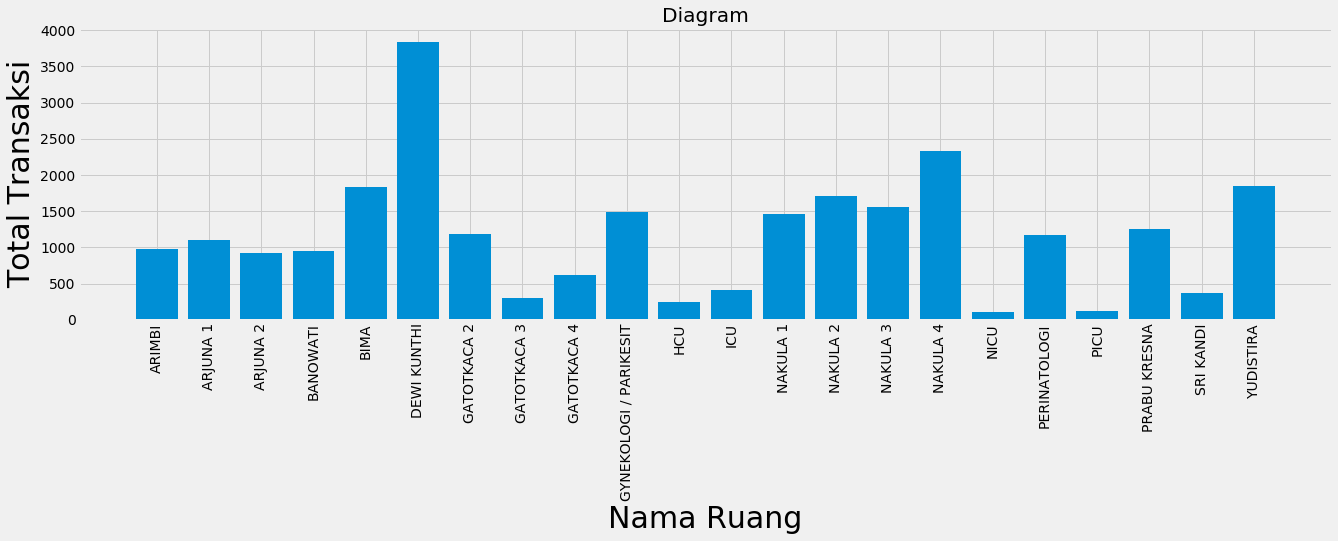

In [55]:
plt.figure(figsize=((20,5)))
plt.bar([int(x) for x in range(0, len(ruang[:,1]))], [int(x) for x in ruang[:,1]] )
plt.xlabel('Nama Ruang', fontsize=30)
plt.ylabel('Total Transaksi', fontsize=30)
plt.xticks([int(x) for x in range(0, len(ruang[:,0]))], [x for x in ruang[:,0]], rotation=90)
plt.title('Diagram')
plt.show()

[(1, 'JANUARI', 452), (2, 'FEBRUARI', 373), (3, 'MARET', 447), (4, 'APRIL', 457), (5, 'MEI', 438), (6, 'JUNI', 323), (7, 'JULI', 370), (8, 'AGUSTUS', 363), (9, 'SEPTEMBER', 308), (10, 'OKTOBER', 305)]


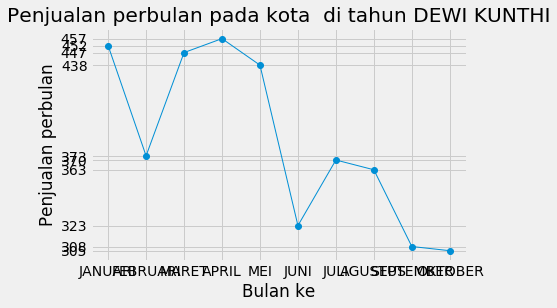

,Nomor Bulan,Bulan,Total Transaksi
1,1,JANUARI,452
2,2,FEBRUARI,373
3,3,MARET,447
4,4,APRIL,457
5,5,MEI,438
6,6,JUNI,323
7,7,JULI,370
8,8,AGUSTUS,363
9,9,SEPTEMBER,308
10,10,OKTOBER,305


In [56]:
ruang = "DEWI KUNTHI"
c.execute('''SELECT bulan.id_bulan, bulan.nama_bulan, sum(transaksi.nilai) as total from transaksi join pembayaran on pembayaran.id_pembayaran = transaksi.id_pembayaran
join bulan on bulan.id_bulan = transaksi.id_bulan join ruang on ruang.id_ruang = transaksi.id_ruang where ruang.nama_ruang = "''' + str(ruang) +'''"
          group by bulan.nama_bulan order by bulan.id_bulan asc''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)

print(tahun_kota)
np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[2]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ x[1] for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[2]) for x in np_tahun_kota[:,:]], [ int(x[2]) for x in np_tahun_kota[:,:]])
plt.xlabel('Bulan ke')
plt.ylabel('Penjualan perbulan')
plt.title("Penjualan perbulan pada kota " + " di tahun " + ruang)
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Nomor Bulan', 'Bulan', 'Total Transaksi']
df.index = np.arange(1,len(df)+1)
df